In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('BankCustomers.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df_x = df.iloc[:,3:-1]
df_y = df.iloc[:,-1:]

In [4]:
df_x = pd.get_dummies(df_x, drop_first = True)

In [5]:
df_x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [18]:
columns_to_scale = [i for i in df_x.columns if max(df_x[i])>10]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_x[columns_to_scale] = scaler.fit_transform(df_x[columns_to_scale])

In [22]:
df_x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,0,0,0
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,1,0
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,0,0,0
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,1,0


In [26]:
df_x.shape

(10000, 11)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
ann = Sequential()

In [27]:
ann.add(Dense(activation = 'relu', units = 6, input_dim = 11, kernel_initializer = 'uniform'))

Instructions for updating:
Colocations handled automatically by placer.


In [28]:
ann.add(Dense(activation = 'relu', units = 10, kernel_initializer = 'uniform'))

In [33]:
ann.add(Dense(activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

In [35]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
ann.fit(x_train, y_train, batch_size = 50, epochs = 2000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2000
7500/7500 [==============================] - 1s 95us/step - loss: 0.5937 - acc: 0.7985
Epoch 2/2000
7500/7500 [==============================] - 0s 21us/step - loss: 0.4629 - acc: 0.7984
Epoch 3/2000
7500/7500 [==============================] - 0s 22us/step - loss: 0.4349 - acc: 0.7984
Epoch 4/2000
7500/7500 [==============================] - 0s 23us/step - loss: 0.4250 - acc: 0.7984
Epoch 5/2000
7500/7500 [==============================] - 0s 21us/step - loss: 0.4229 - acc: 0.7984
Epoch 6/2000
7500/7500 [==============================] - 0s 22us/step - loss: 0.4216 - acc: 0.7984
Epoch 7/2000
7500/7500 [==============================] - 0s 22us/step - loss: 0.4209 - acc: 0.7984
Epoch 8/2000
7500/7500 [==============================] - 0s 27us/step - loss: 0.4205 - acc: 0.7984
Epoch 9/2000
7500/7500 [==============================] - 0s 30us/step - loss: 0.4198 - acc: 0.7984
Epoch 10/2000
7500/7500 [===========================

7500/7500 [==============================] - 0s 29us/step - loss: 0.3905 - acc: 0.8403
Epoch 159/2000
7500/7500 [==============================] - 0s 32us/step - loss: 0.3917 - acc: 0.8404
Epoch 160/2000
7500/7500 [==============================] - 0s 32us/step - loss: 0.3904 - acc: 0.8405
Epoch 161/2000
7500/7500 [==============================] - 0s 38us/step - loss: 0.3908 - acc: 0.8380
Epoch 162/2000
7500/7500 [==============================] - 0s 31us/step - loss: 0.3908 - acc: 0.8396
Epoch 163/2000
7500/7500 [==============================] - 0s 31us/step - loss: 0.3913 - acc: 0.8403
Epoch 164/2000
7500/7500 [==============================] - 0s 26us/step - loss: 0.3912 - acc: 0.8387
Epoch 165/2000
7500/7500 [==============================] - 0s 28us/step - loss: 0.3914 - acc: 0.8385
Epoch 166/2000
7500/7500 [==============================] - 0s 27us/step - loss: 0.3914 - acc: 0.8399
Epoch 167/2000
7500/7500 [==============================] - 0s 28us/step - loss: 0.3913 - acc: 0.

7500/7500 [==============================] - 0s 30us/step - loss: 0.3631 - acc: 0.8477
Epoch 318/2000
7500/7500 [==============================] - 0s 30us/step - loss: 0.3625 - acc: 0.8489
Epoch 319/2000
7500/7500 [==============================] - 0s 40us/step - loss: 0.3619 - acc: 0.8477
Epoch 320/2000
7500/7500 [==============================] - 0s 31us/step - loss: 0.3619 - acc: 0.8477
Epoch 321/2000
7500/7500 [==============================] - 0s 27us/step - loss: 0.3616 - acc: 0.8493
Epoch 322/2000
7500/7500 [==============================] - 0s 37us/step - loss: 0.3617 - acc: 0.8483
Epoch 323/2000
7500/7500 [==============================] - 0s 39us/step - loss: 0.3622 - acc: 0.8492
Epoch 324/2000
7500/7500 [==============================] - 0s 40us/step - loss: 0.3626 - acc: 0.8480
Epoch 325/2000
7500/7500 [==============================] - 0s 36us/step - loss: 0.3612 - acc: 0.8480
Epoch 326/2000
7500/7500 [==============================] - 0s 36us/step - loss: 0.3615 - acc: 0.

7500/7500 [==============================] - 0s 25us/step - loss: 0.3568 - acc: 0.8523
Epoch 477/2000
7500/7500 [==============================] - 0s 23us/step - loss: 0.3578 - acc: 0.8504
Epoch 478/2000
7500/7500 [==============================] - 0s 22us/step - loss: 0.3573 - acc: 0.8508
Epoch 479/2000
7500/7500 [==============================] - 0s 27us/step - loss: 0.3576 - acc: 0.8520
Epoch 480/2000
7500/7500 [==============================] - 0s 27us/step - loss: 0.3565 - acc: 0.8504
Epoch 481/2000
7500/7500 [==============================] - 0s 30us/step - loss: 0.3566 - acc: 0.8504
Epoch 482/2000
7500/7500 [==============================] - 0s 28us/step - loss: 0.3573 - acc: 0.8504
Epoch 483/2000
7500/7500 [==============================] - 0s 34us/step - loss: 0.3563 - acc: 0.8496
Epoch 484/2000
7500/7500 [==============================] - 0s 39us/step - loss: 0.3569 - acc: 0.8539
Epoch 485/2000
7500/7500 [==============================] - 0s 39us/step - loss: 0.3567 - acc: 0.

7500/7500 [==============================] - 0s 19us/step - loss: 0.3539 - acc: 0.8515
Epoch 636/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3550 - acc: 0.8509
Epoch 637/2000
7500/7500 [==============================] - 0s 22us/step - loss: 0.3541 - acc: 0.8521
Epoch 638/2000
7500/7500 [==============================] - 0s 24us/step - loss: 0.3543 - acc: 0.8519
Epoch 639/2000
7500/7500 [==============================] - 0s 24us/step - loss: 0.3541 - acc: 0.8528
Epoch 640/2000
7500/7500 [==============================] - 0s 23us/step - loss: 0.3543 - acc: 0.8527
Epoch 641/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3544 - acc: 0.8511
Epoch 642/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3548 - acc: 0.8523
Epoch 643/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3544 - acc: 0.8537
Epoch 644/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3543 - acc: 0.

7500/7500 [==============================] - 0s 19us/step - loss: 0.3546 - acc: 0.8516
Epoch 796/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3538 - acc: 0.8517
Epoch 797/2000
7500/7500 [==============================] - 0s 23us/step - loss: 0.3533 - acc: 0.8527
Epoch 798/2000
7500/7500 [==============================] - 0s 26us/step - loss: 0.3537 - acc: 0.8525
Epoch 799/2000
7500/7500 [==============================] - 0s 27us/step - loss: 0.3547 - acc: 0.8525
Epoch 800/2000
7500/7500 [==============================] - 0s 27us/step - loss: 0.3538 - acc: 0.8533
Epoch 801/2000
7500/7500 [==============================] - 0s 22us/step - loss: 0.3527 - acc: 0.8549
Epoch 802/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3541 - acc: 0.8517
Epoch 803/2000
7500/7500 [==============================] - 0s 26us/step - loss: 0.3536 - acc: 0.8523
Epoch 804/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3532 - acc: 0.

7500/7500 [==============================] - 0s 20us/step - loss: 0.3531 - acc: 0.8532
Epoch 954/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3522 - acc: 0.8520
Epoch 955/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3521 - acc: 0.8532
Epoch 956/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3518 - acc: 0.8527
Epoch 957/2000
7500/7500 [==============================] - 0s 21us/step - loss: 0.3527 - acc: 0.8529
Epoch 958/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3513 - acc: 0.8521
Epoch 959/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3513 - acc: 0.8537
Epoch 960/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3517 - acc: 0.8549
Epoch 961/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3514 - acc: 0.8525
Epoch 962/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3520 - acc: 0.

7500/7500 [==============================] - 0s 20us/step - loss: 0.3308 - acc: 0.8620
Epoch 1034/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3302 - acc: 0.8619
Epoch 1035/2000
7500/7500 [==============================] - 0s 21us/step - loss: 0.3308 - acc: 0.8623
Epoch 1036/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3302 - acc: 0.8633
Epoch 1037/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3302 - acc: 0.8628
Epoch 1038/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3299 - acc: 0.8633
Epoch 1039/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3304 - acc: 0.8619
Epoch 1040/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3293 - acc: 0.8641
Epoch 1041/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3293 - acc: 0.8633
Epoch 1042/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3293 

7500/7500 [==============================] - 0s 19us/step - loss: 0.3241 - acc: 0.8645
Epoch 1113/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3234 - acc: 0.8717
Epoch 1114/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3240 - acc: 0.8687
Epoch 1115/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3242 - acc: 0.8696
Epoch 1116/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3240 - acc: 0.8672
Epoch 1117/2000
7500/7500 [==============================] - 0s 22us/step - loss: 0.3232 - acc: 0.8676
Epoch 1118/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3233 - acc: 0.8697
Epoch 1119/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3241 - acc: 0.8692
Epoch 1120/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3244 - acc: 0.8696
Epoch 1121/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3232 

7500/7500 [==============================] - 0s 19us/step - loss: 0.3196 - acc: 0.8704
Epoch 1271/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3208 - acc: 0.8688
Epoch 1272/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3210 - acc: 0.8683
Epoch 1273/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3218 - acc: 0.8695
Epoch 1274/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3193 - acc: 0.8711
Epoch 1275/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3208 - acc: 0.8715
Epoch 1276/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3206 - acc: 0.8708
Epoch 1277/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3215 - acc: 0.8708
Epoch 1278/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3212 - acc: 0.8707
Epoch 1279/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3215 

7500/7500 [==============================] - 0s 19us/step - loss: 0.3193 - acc: 0.8705
Epoch 1429/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3190 - acc: 0.8697
Epoch 1430/2000
7500/7500 [==============================] - 0s 18us/step - loss: 0.3199 - acc: 0.8692
Epoch 1431/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3193 - acc: 0.8711
Epoch 1432/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3187 - acc: 0.8697
Epoch 1433/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3180 - acc: 0.8709
Epoch 1434/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3181 - acc: 0.8703
Epoch 1435/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3193 - acc: 0.8704
Epoch 1436/2000
7500/7500 [==============================] - 0s 21us/step - loss: 0.3197 - acc: 0.8713
Epoch 1437/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3187 

7500/7500 [==============================] - 0s 19us/step - loss: 0.3160 - acc: 0.8739
Epoch 1587/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3175 - acc: 0.8721
Epoch 1588/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3167 - acc: 0.8715
Epoch 1589/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3166 - acc: 0.8727
Epoch 1590/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3160 - acc: 0.8731
Epoch 1591/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3159 - acc: 0.8724
Epoch 1592/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3165 - acc: 0.8728
Epoch 1593/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3164 - acc: 0.8741
Epoch 1594/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3157 - acc: 0.8724
Epoch 1595/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3155 

7500/7500 [==============================] - 0s 19us/step - loss: 0.3145 - acc: 0.8717
Epoch 1745/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3144 - acc: 0.8736
Epoch 1746/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3149 - acc: 0.8721
Epoch 1747/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3160 - acc: 0.8716
Epoch 1748/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3143 - acc: 0.8715
Epoch 1749/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3156 - acc: 0.8716
Epoch 1750/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3149 - acc: 0.8733
Epoch 1751/2000
7500/7500 [==============================] - 0s 18us/step - loss: 0.3148 - acc: 0.8719
Epoch 1752/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3146 - acc: 0.8719
Epoch 1753/2000
7500/7500 [==============================] - 0s 19us/step - loss: 0.3145 

7500/7500 [==============================] - 0s 22us/step - loss: 0.3137 - acc: 0.8739
Epoch 1903/2000
7500/7500 [==============================] - 0s 23us/step - loss: 0.3150 - acc: 0.8723
Epoch 1904/2000
7500/7500 [==============================] - 0s 21us/step - loss: 0.3132 - acc: 0.8745
Epoch 1905/2000
7500/7500 [==============================] - 0s 20us/step - loss: 0.3133 - acc: 0.8715
Epoch 1906/2000
7500/7500 [==============================] - 0s 22us/step - loss: 0.3160 - acc: 0.8729
Epoch 1907/2000
7500/7500 [==============================] - 0s 22us/step - loss: 0.3141 - acc: 0.8723
Epoch 1908/2000
7500/7500 [==============================] - 0s 21us/step - loss: 0.3143 - acc: 0.8727
Epoch 1909/2000
7500/7500 [==============================] - 0s 22us/step - loss: 0.3150 - acc: 0.8725
Epoch 1910/2000
7500/7500 [==============================] - ETA: 0s - loss: 0.3153 - acc: 0.871 - 0s 22us/step - loss: 0.3155 - acc: 0.8709
Epoch 1911/2000
7500/7500 [========================

In [40]:
y_pred = ann.predict(x_test)

In [58]:
y_pred_round = [round(i) for i in y_pred[:,0]]

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred_round))

0.8464


In [62]:
print(confusion_matrix(y_test, y_pred_round))

[[1869  106]
 [ 278  247]]


In [61]:
print(classification_report(y_test, y_pred_round))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1975
           1       0.70      0.47      0.56       525

    accuracy                           0.85      2500
   macro avg       0.79      0.71      0.73      2500
weighted avg       0.83      0.85      0.83      2500



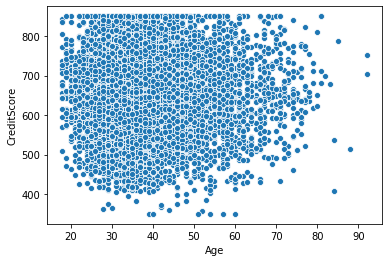

In [81]:
sns.scatterplot(x = df.Age, y = df.CreditScore)
plt.show()

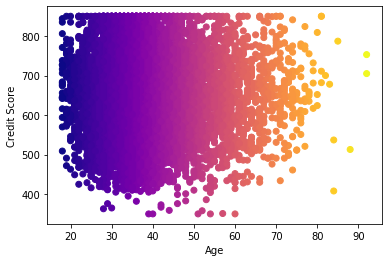

In [6]:
plt.scatter(x = df.Age, y = df.CreditScore, c = df.Age, cmap = 'plasma')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()